Chapter 1

In [2]:
# session

import tensorflow as tf

x = tf.constant(1, name='x')
y = tf.Variable(x+9,name='y')


model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

10


In [3]:
#a simple Python code
x = 1
y = x + 9
print(y)

# ... and the tensorflow translation of the previous code
import tensorflow as tf

x = tf.constant(1, name='x')
y = tf.Variable(x+9,name='y')
print(y)

10
Tensor("y_2/read:0", shape=(), dtype=int32)


In [13]:
# programming model

import tensorflow as tf

a = tf.placeholder("int32")
b = tf.placeholder("int32")

y = tf.multiply(a,b)

sess = tf.Session()

print(sess.run(y, feed_dict={a : 2,b:5}))

10


In [15]:
# tensorboard

import tensorflow as tf

a = tf.constant(10,name="a")
b = tf.constant(90,name="b")
y = tf.Variable(a+b*2,name='y')
model = tf.global_variables_initializer()

with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/tmp/tensorflowlogs",session.graph)
    session.run(model)
    print(session.run(y))
    
    
# tensorboard --logdir=/tmp/tensorflowlogs

190


Chapter 2

In [18]:
# 1d tensor

import tensorflow as tf
import numpy as np

tensor_1d = np.array([1.3,1,4.0,23.99])

print (tensor_1d)
print (tensor_1d[0])
print (tensor_1d[2])


tf_tensor = tf.convert_to_tensor(tensor_1d, dtype=tf.float64)

with tf.Session() as sess:
    print (sess.run(tf_tensor))
    print (sess.run(tf_tensor[0]))
    print (sess.run(tf_tensor[2]))

[  1.3    1.     4.    23.99]
1.3
4.0
[  1.3    1.     4.    23.99]
1.3
4.0


In [24]:
# 2d tensor

import tensorflow as tf
import numpy as np

tensor_2d=np.array([(1,2,3,4),(4,5,6,7),(8,9,10,11),(12,13,14,15)])

print (tensor_2d)
print (tensor_2d[3][3])
print (tensor_2d[0:2,0:2])

print(tensor_2d.shape)

tf_tensor = tf.placeholder(tf.float64,tensor_2d.shape,name='x')
with tf.Session() as sess:
    print (sess.run(x))

[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
15
[[1 2]
 [4 5]]
(4, 4)
1


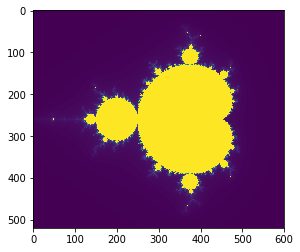

In [29]:
# fractals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#MANDELBROT SET
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

#JULIA SET
#Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]

#Definiamo il punto corrente 
Z = X + Y*1j
c = tf.constant(Z)

zs = tf.Variable(c)
ns = tf.Variable(tf.zeros_like(c, tf.float32))

#c = complex(0.0,0.75)
#c = complex(-1.5,-1.5)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Compute the new values of z: z^2 + x
zs_ = zs*zs + c
#zs_ = zs*zs - c

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

for i in range(200): step.run()

plt.imshow(ns.eval())
plt.show()

In [31]:
# gradient

import tensorflow as tf

x = tf.placeholder(tf.float32)
func = 2*x*x   
var_grad = tf.gradients(func, x)
with tf.Session() as session:
    var_grad_val = session.run(var_grad,feed_dict={x:1})
    print(var_grad_val)

[4.0]


input dim = 3
input shape = (80, 144, 3)


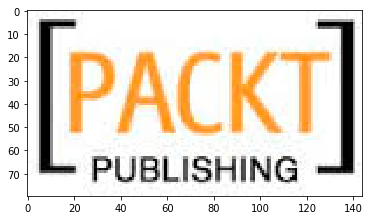

(16, 144, 3)


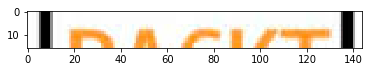

In [32]:
# handling tensors 1

#STEP 1 --- PREPARE THE DATA
import matplotlib.image as mp_image
filename = "packt.jpeg"
input_image = mp_image.imread(filename)

#dimension
print ('input dim = {}'.format(input_image.ndim))
#shape
print ('input shape = {}'.format(input_image.shape))

import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

import tensorflow as tf

my_image = tf.placeholder("uint8",[None,None,3])
slice = tf.slice(my_image,[10,0,0],[16,-1,-1])


with tf.Session() as session:
    result = session.run(slice,feed_dict={my_image: input_image})
    print(result.shape)

plt.imshow(result)
plt.show()

input dim = 3
input shape = (80, 144, 3)


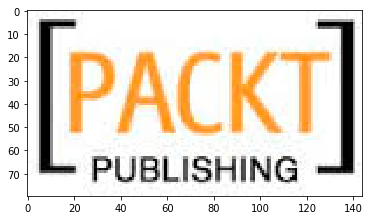

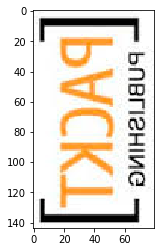

In [34]:
#handling tensors 2


#STEP 1 --- PREPARE THE DATA
import matplotlib.image as mp_image
filename = "packt.jpeg"
input_image = mp_image.imread(filename)

#dimension
print ('input dim = {}'.format(input_image.ndim))
#shape
print ('input shape = {}'.format(input_image.shape))

height,width,depth= input_image.shape

import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

import tensorflow as tf

x = tf.Variable(input_image,name='x')
model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    session.run(model)
    result=session.run(x)

plt.imshow(result)
plt.show()

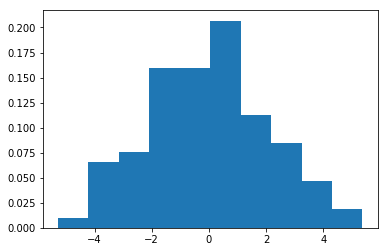

[ 0.71501517  0.11217356  0.53215325  0.73005426  0.08931518  0.3972652
  0.11201298  0.32142961  0.5471158   0.17482615  0.08958781  0.13375092
  0.63651228  0.37518704  0.98348641  0.62983537  0.98698986  0.61615396
  0.33603358  0.21438622  0.33705175  0.85365891  0.27473652  0.3518157
  0.65836477  0.31007171  0.52567065  0.84091461  0.68727517  0.70012629
  0.96906817  0.85973907  0.43867481  0.65485132  0.05602598  0.21587765
  0.44781721  0.37720633  0.98753667  0.47275531  0.11028814  0.58274794
  0.59258509  0.76400614  0.54480731  0.5337255   0.61509955  0.82874084
  0.94163024  0.01699245  0.13431489  0.95536208  0.86788356  0.07401299
  0.6138674   0.64612305  0.26512575  0.50610745  0.19600618  0.78633666
  0.78249991  0.42649448  0.53777337  0.43511915  0.17971516  0.24690711
  0.86736405  0.48587024  0.8688302   0.94367373  0.8357091   0.61086357
  0.05326986  0.25855935  0.74946272  0.240821    0.05803323  0.11794603
  0.41765749  0.61201274  0.05527949  0.35195613  0.9

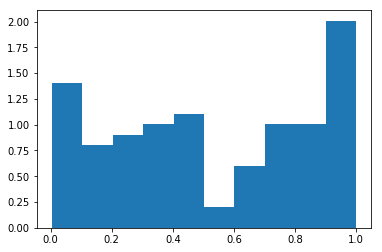

First Run


uniform with (seed = 1) = [ 0.23903739]
uniform with (seed = 1) = [ 0.22267115]
uniform without seed = [ 0.47543514]
uniform without seed = [ 0.57335842]
Second Run


uniform with (seed = 1) = [ 0.23903739]
uniform with (seed = 1) = [ 0.22267115]
uniform without seed = [ 0.11225116]
uniform without seed = [ 0.04836047]


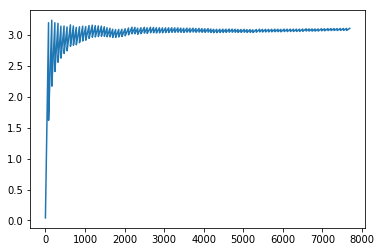

In [37]:
# random numbers

import tensorflow as tf
import matplotlib.pyplot as plt

# Create a tensor of shape [100] consisting of random normal values, with mean
# 0 and standard deviation 2.
norm = tf.random_normal([100], mean=0, stddev=2)
with tf.Session() as sess1:
    plt.hist(norm.eval(),normed=True)
    plt.show()  


uniform = tf.random_uniform([100],minval=0,maxval=1,dtype=tf.float32)
with tf.Session() as sess2:
    print (uniform.eval())
    plt.hist(uniform.eval(),normed=True)
    plt.show() 


uniform_with_seed = tf.random_uniform([1], seed=1)
uniform_without_seed = tf.random_uniform([1])

# Repeatedly running this block with the same graph will generate the same
# sequence of values for 'a', but different sequences of values for 'b'.
print("First Run")
with tf.Session() as first_session:
  print("uniform with (seed = 1) = {}"\
        .format(first_session.run(uniform_with_seed)))  
  print("uniform with (seed = 1) = {}"\
        .format(first_session.run(uniform_with_seed)))
  print("uniform without seed = {}"\
        .format(first_session.run(uniform_without_seed)))  
  print("uniform without seed = {}"\
        .format(first_session.run(uniform_without_seed)))  

print("Second Run")
with tf.Session() as second_session:
  print("uniform with (seed = 1) = {}"\
        .format(second_session.run(uniform_with_seed)))  
  print("uniform with (seed = 1) = {}"\
        .format(second_session.run(uniform_with_seed)))  
  print("uniform without seed = {}"\
        .format(second_session.run(uniform_without_seed)))  
  print("uniform without seed = {}"\
        .format(second_session.run(uniform_without_seed)))



import tensorflow as tf

trials = 100
hits = 0
x = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
y = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
pi = []
sess = tf.Session()
with sess.as_default():
    for i in range(1,trials):
        for j in range(1,trials):
            if x.eval()**2 + y.eval()**2 < 1 :
                hits = hits + 1
                pi.append((4 * float(hits) / i)/trials)  

plt.plot(pi)
plt.show()

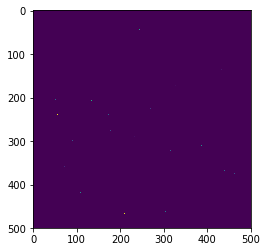

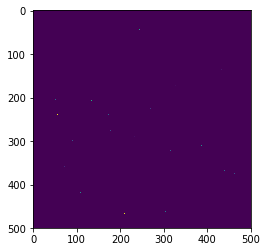

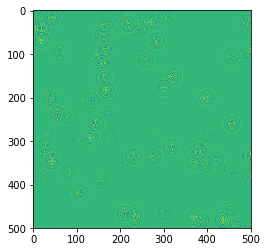

In [43]:
# PDE

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def make_kernel(a):
  """Transform a 2D array into a convolution kernel"""
  a = np.asarray(a)
  a = a.reshape(list(a.shape) + [1,1])
  return tf.constant(a, dtype=1)

def simple_conv(x, k):
  """A simplified 2D convolution operation"""
  x = tf.expand_dims(tf.expand_dims(x, 0), -1)
  y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
  return y[0, :, :, 0]

def laplace(x):
  """Compute the 2D laplacian of an array"""
  laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
  return simple_conv(x, laplace_k)

  
sess = tf.InteractiveSession()

N = 500

# Initial Conditions -- some rain drops hit a pond

# Set everything to zero
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

# Some rain drops hit a pond at random points
for n in range(100):
  a,b = np.random.randint(0, N, 2)
  u_init[a,b] = np.random.uniform()

plt.imshow(u_init)
plt.show()


# Parameters:
# eps -- time resolution
# damping -- wave damping
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

# Create variables for simulation state
U  = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

# Operation to update the state
step = tf.group(
  U.assign(U_),
  Ut.assign(Ut_))

# Initialize state to initial conditions
tf.global_variables_initializer().run()

# Run 1000 steps of PDE
for i in range(1000):
  # Step simulation
  step.run({eps: 0.03, damping: 0.04})
  # Visualize every 50 steps
  if i % 500 == 0:
      clear_output()
      plt.imshow(U.eval())
      plt.show()

In [40]:
# montecarlo

import tensorflow as tf

trials = 100
hits = 0
x = tf.random_uniform([1],minval=0,maxval=1,dtype=tf.float32)
y = tf.random_uniform([1],minval=0,maxval=1,dtype=tf.float32)

sess = tf.Session()
with sess.as_default():
    for i in range(1,trials):
        for j in range(1,trials):
            if x.eval()**2 + y.eval()**2 < 1 :
                hits = hits + 1
        print ((4 * float(hits) / i)/trials)

2.92
3.04
3.066666666666667
3.12
3.16
3.16
3.137142857142857
3.135
3.146666666666667
3.1319999999999997
3.1490909090909094
3.1333333333333333


3.123076923076923
3.1342857142857143
3.1226666666666665
3.1075
3.0894117647058823
3.0955555555555554
3.1115789473684208
3.122
3.106666666666667


3.110909090909091
3.114782608695652
3.11
3.1136
3.1076923076923078
3.1051851851851855
3.1042857142857145
3.107586206896552
3.098666666666667
3.104516129032258
3.10625


3.103030303030303
3.105882352941176
3.1142857142857143
3.1111111111111107
3.1070270270270273
3.1105263157894734
3.112820512820513
3.116
3.1121951219512196
3.11047619047619
3.103255813953488
3.1072727272727274


3.1111111111111107
3.1095652173913044
3.1131914893617023
3.1166666666666667
3.1175510204081633
3.1136
3.116862745098039
3.1192307692307693
3.1222641509433964
3.1251851851851855


3.120727272727273
3.1271428571428572
3.122105263157895
3.1220689655172413
3.1227118644067797
3.1246666666666663
3.12655737704918
3.1270967741935483
3.13015873015873
3.13125
3.1298461538461537
3.1260606060606064


3.1265671641791046
3.1270588235294117
3.12463768115942
3.1234285714285717
3.1228169014084504
3.123333333333333
3.1232876712328768
3.1281081081081084
3.1205333333333334
3.1242105263157898
3.1241558441558444


3.125641025641025
3.123544303797468
3.123
3.1214814814814815
3.122439024390244
3.1195180722891562
3.1176190476190477
3.118588235294118
3.1186046511627903


3.1195402298850574
3.121818181818182
3.1191011235955055
3.1204444444444444
3.1217582417582417
3.1226086956521737
3.120430107526882
3.1170212765957444
3.1162105263157893
3.114583333333333
3.113814432989691


3.109795918367347
3.1115151515151513


Chapter 3

In [49]:
# k-means

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
      labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame\
            (dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()


num_vectors = 2000
num_clusters = 4
n_samples_per_cluster = 500

num_steps = 1000
x_values = []
y_values = []
vector_values = []

#CREATE RANDOM DATA
for i in range(num_vectors):
  if np.random.random() > 0.5:
    x_values.append(np.random.normal(0.4, 0.7))
    y_values.append(np.random.normal(0.2, 0.8))
    
  else:
    x_values.append(np.random.normal(0.6, 0.4))
    y_values.append(np.random.normal(0.8, 0.5))
vector_values = zip(x_values,y_values)
vectors = tf.constant(vector_values)

n_samples = tf.shape(vector_values)[0]
random_indices = tf.random_shuffle(tf.range(0, n_samples))
begin = [0,]
size = [num_clusters,]
size[0] = num_clusters
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values, centroid_indices))
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

vectors_subtration = tf.subtract(expanded_vectors,expanded_centroids)
euclidean_distances = tf.reduce_sum(tf.square(vectors_subtration), 2)

assignments = tf.to_int32(tf.argmin(euclidean_distances, 0))

partitions = [0, 0, 1, 1, 0]
num_partitions = 2
data = [10, 20, 30, 40, 50]
outputs[0] = [10, 20, 50]
outputs[1] = [30, 40]
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)

update_centroids = tf.concat(0, [tf.expand_dims(tf.reduce_mean(partition, 0), 0) for partition in partitions])


init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)
for step in range(num_steps):
   _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])


display_partition(x_values,y_values,assignment_values)

plt.plot(x_values,y_values, 'o', label='Input Data')
plt.legend()
plt.show()

TypeError: Expected binary or unicode string, got <zip object at 0x132a240c8>

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
